In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
data=pd.read_excel('PH17B009.xlsx')

In [4]:
data

,Temp,mV,Rho,Rho_c,1/T,log(rho_c)
0,303.15,511,1.283632,0.230124,0.003299,-2.481658
1,308.15,493,1.238416,0.222018,0.003245,-2.488762
2,313.15,466,1.170592,0.209859,0.003193,-2.495752
3,318.15,433,1.087696,0.194997,0.003143,-2.502632
4,323.15,397,0.997264,0.178785,0.003095,-2.509404
5,328.15,359,0.901808,0.161672,0.003047,-2.516072
6,333.15,322,0.808864,0.145010,0.003002,-2.522640
7,338.15,286,0.718432,0.128797,0.002957,-2.529109
8,343.15,255,0.640560,0.114837,0.002914,-2.535484
9,348.15,225,0.565200,0.101327,0.002872,-2.541766


In [5]:
x=data['Temp']
y=data['mV']

Text(0.5, 1.0, 'Temp vs Rho_c')

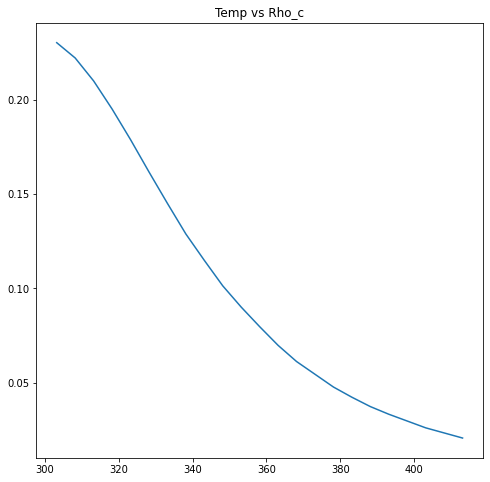

In [6]:
plt.plot(data['Temp'],data['Rho_c'],'-')
plt.title("Temp vs Rho_c")

Text(0.5, 1.0, '1/T vs Log(rho_c )')

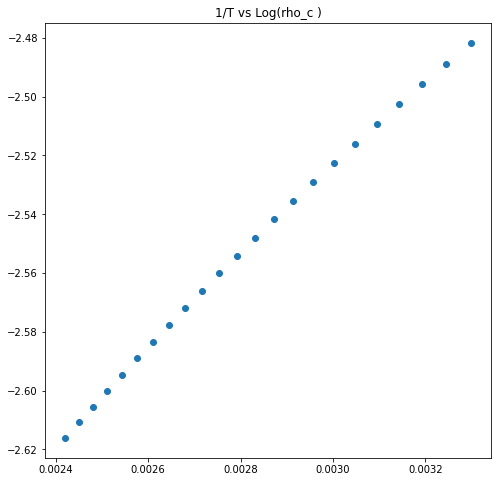

In [7]:
plt.plot(data['1/T'],data['log(rho_c)'],'o')
plt.title("1/T vs Log(rho_c )")

fitting a line 

In [8]:
x_vals = data['1/T']
y_vals = data['log(rho_c)']

In [9]:
def obj(x,m,c):
    return (m*x+c)

In [10]:
from scipy.optimize import curve_fit

In [11]:
popt,_ = curve_fit(obj,x_vals,y_vals)

In [12]:
m,c=popt
print("log(rho_c) = %.5f*(1/T) + %.5f " %(m,c))

log(rho_c) = 153.40202*(1/T) + -2.98424 


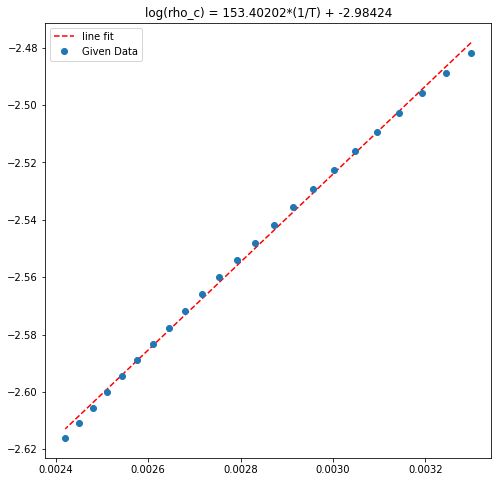

In [13]:
x= data['1/T']
y=m*x+c
plt.plot(x,y,'--',color='red',label= "line fit")
plt.plot(data['1/T'],data['log(rho_c)'],'o',label="Given Data") 
plt.title("log(rho_c) = 153.40202*(1/T) + -2.98424")
plt.legend(loc="upper left")
plt.show()

$ E_{g} = slope * 2 * K_{b} $

In [14]:
Eg = m * 2 *8.617333262*(2*10**-4)
print("Value of Eg = ",Eg, "eV")

Value of Eg =  0.5287665390440575 eV


# Eg = 0.5287665390440575 eV

In [15]:
import math
A = math.exp(c)
print(A)

0.05057809182622759


Error in the fit is 

In [16]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(data['log(rho_c)'],y)
mse 

2.841613091626016e-06

# Error  = 2.841613091626016 e-04